# OOP polymorphism

In [77]:
# example with Python built-in
print(f"{len([1,23,4])=}")
print(f"{len('1234')=}")

len([1,23,4])=3
len('1234')=4


## Polymorphism in class method

In [78]:
class fish:
    def __init__(self, name) -> None:
        self.name = name

    # overrided dunder string method
    def __str__(self) -> str:
        return f"I am a fish with the name {self.name}"

    # overrided dunder repper method
    def __repr__(self) -> str:
        return f"Fish(name='{self.name}')"

    def speak(self):
        print("Blubb blubb")


class fox:
    def __init__(self, name) -> None:
        self.name = name

    def __str__(self) -> str:
        return f"I am a fox with the name {self.name}, my sound is mysterious"

    def speak(self):
        return NotImplemented


In [79]:
fish1 = fish("Guppie")
print(fish1)
repr(fish1)

I am a fish with the name Guppie


"Fish(name='Guppie')"

In [80]:
fox1 = fox("Ylvis")
animals = (fish1, fox1)

for animal in animals:
    print(animal)
    animal.speak()

I am a fish with the name Guppie
Blubb blubb
I am a fox with the name Ylvis, my sound is mysterious


## Operator overloading

In [81]:
from __future__ import annotations
import matplotlib.pyplot as plt

class Vector:
    """A class to represent Euclidean vector with magnitude and direction"""

    def __init__(self, *numbers: float | int) -> None:
        
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number")

        if len(numbers) <= 0:
            raise ValueError("Vectors can't be empty")

        self._numbers = tuple(float(number) for number in numbers)
    
    @property
    def numbers(self) -> tuple:
        return self._numbers

    # operator overload +
    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a+b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    # operator overload -
    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a-b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def validate_vectors(self, other: Vector) -> bool:
        """Validates if two vectors have same lenght"""
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError("Both Must be Vector and have same lenght")
        return len(self) == len(other)

    # to use len() on Vector have to overload it
    def __len__(self) -> int:
        """Return number of elements in a Vector not the lenght of the Vector"""
        return len(self.numbers)

    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    def __abs__(self) ->float:
        return sum(a**2 for a in self.numbers)**.5

        # overload * operator
    def __mul__(self, value: float) -> Vector:
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, value: float) -> Vector:
        return self*value

    def plot(self, *others: "Vector") -> None:
        """ Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()

    def __repr__(self) -> str:
        return f"Vector{self._numbers}"

v1 = Vector(1,2,3)
print(v1)

try:
    v2 = Vector()
except ValueError as err:
    print(err)

v2 = Vector(-1, -2)
print(v2.numbers)

v3 = Vector(2,3)

Vector(1.0, 2.0, 3.0)
Vectors can't be empty
(-1.0, -2.0)


In [82]:
print(f"{v2=} {v3=}")
print(v3+v2)
print(v2-v3)
print(len(v2))
print(v3[1])
print(abs(v3))
print(v3*3)

v2=Vector(-1.0, -2.0) v3=Vector(2.0, 3.0)
Vector(1.0, 1.0)
Vector(-3.0, -5.0)
2
3.0
3.605551275463989
__mul__ called
Vector(6.0, 9.0)


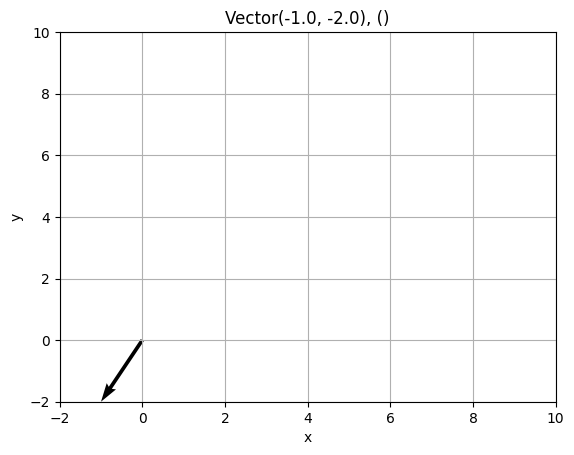

In [83]:
v2.plot()